## Implementação de um Classificador Perceptron

In [1]:
import numpy as np


class Perceptron1(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [2]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron1(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]



## Questao 1 - Implemente uma função para calcular a acurácia do modelo


In [3]:
# X seria o conjunto de dados predito
# Y seria o conjunto de validação

def model_accuracy(x,y):
    count = 0
    for i in range(len(x)):
        if x[i] == y[i]:
            count += 1
    return float(count)/len(y)

## Questao 2 - Implemente um método de validação cruzada para testar 

## Teste o classificador usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

### Para o teste do classificador perceptron utilizamos o famoso dataset do Iris que pode ser carregado pelo seaborn

#### Assim sendo, vimos que o dataset em questão e linearmente separável

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = sns.load_dataset('iris')

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

### Utilizamos alguns métodos do sklearn para facilitar o treinamento e o entendimento do classificador perceptron

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [21]:
X = df.iloc[:,:4].values
Y = df.iloc[:,4].values

In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
Y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

### Transformação dos labels em inteiros utilizando o LabelEncoder do sklearn


In [23]:
le = LabelEncoder()

Y = le.fit_transform(Y)

In [24]:
le.transform(['versicolor','setosa','virginica'])

array([1, 0, 2], dtype=int64)

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Aqui podemos ver que o dataset é linearmente separado por uma reta

In [25]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


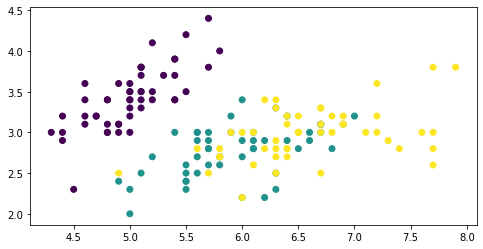

In [12]:
plt.figure(figsize=(8,4))
plt.scatter('sepal_length','sepal_width',data=df,c=Y)

In [27]:
plt.figure(figsize=(8,4))
plt.scatter(data=X,c=Y)

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

<Figure size 576x288 with 0 Axes>

### Dividindo o conjunto em Treino e Testes

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### Utilizando o pipeline para agrupar operações atômicas

In [13]:
pipe_perceptron = make_pipeline(StandardScaler(),Perceptron(eta0=0.1,max_iter= 400,random_state=1))

In [14]:
pipe_perceptron.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron',
                 Perceptron(eta0=0.1, max_iter=400, random_state=1))])

In [15]:
y_pred = pipe_perceptron.predict(x_test)

### Utilizando o score para medir a acurácia do modelo

In [55]:
print("Teste de acurácia: %.3f"%model_accuracy(y_pred,y_test))

Teste de acurácia: 0.900


## Testando o Perceptron em um dataset que não é linearmente separável.

### O dataset em questão fala sobre glaucoma, ou seja se for 1 tem glaucoma se for 0 não

In [57]:
data = pd.read_csv('GlaucomaKaggle.csv')

In [58]:
data.head()

,Unnamed: 0,Image,CDR,NRR,Glaucoma
0,0,image100prime.tif,0.126922,0.433630,1
1,1,image101prime.tif,0.264441,0.299960,1
2,2,image102prime.tif,0.160221,0.313630,1
3,3,image103prime.tif,0.172314,0.009395,1
4,4,image104prime.tif,0.249229,0.556696,1


In [73]:
data.fillna(value=0)

,Unnamed: 0,Image,CDR,NRR,Glaucoma
0,0,image100prime.tif,0.126922,0.433630,1
1,1,image101prime.tif,0.264441,0.299960,1
2,2,image102prime.tif,0.160221,0.313630,1
3,3,image103prime.tif,0.172314,0.009395,1
4,4,image104prime.tif,0.249229,0.556696,1
...,...,...,...,...,...
195,195,aa4407aab872.png,0.288790,0.140951,0
196,196,aa5ce75edcf5.png,0.216337,0.940237,0
197,197,aa60813e1a8d.png,0.339300,1.300676,0
198,198,aa6242f9e08c.png,0.376749,0.876241,0


In [86]:
data = data[data['CDR'] != np.inf] 

In [88]:
data = data[data['NRR'] != np.inf] 

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    int64  
 1   Image       194 non-null    object 
 2   CDR         194 non-null    float64
 3   NRR         194 non-null    float64
 4   Glaucoma    194 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 9.1+ KB


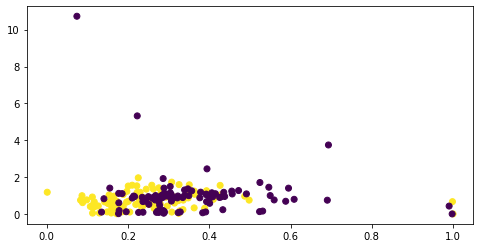

In [94]:
plt.figure(figsize=(8,4))
plt.scatter('CDR','NRR',data=data,c='Glaucoma')

### Percebe-se que os valores estão muito próximos e não é possivel separar linearmente os dados

In [95]:
A = data.iloc[:,2:4].values
B = data.iloc[:,4].values

### Dividindo o Conjunto

In [96]:
a_train,a_test,b_train,b_test = train_test_split(A,B,test_size=0.3)

### Utilizando o pipeline para agrupar operações atômicas

#### Utilizando o StandardScaler para normalizar os dados

In [101]:
pipe_glaucoma = make_pipeline(StandardScaler(),Perceptron(eta0=0.1,max_iter= 400,random_state=1))

In [102]:
pipe_glaucoma.fit(a_train,b_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron',
                 Perceptron(eta0=0.1, max_iter=400, random_state=1))])

In [103]:
b_pred = pipe_glaucoma.predict(a_test)

In [104]:
print("Teste de acurácia: %.3f"% model_accuracy(b_pred,b_test))

Teste de acurácia: 0.661


### Assim sendo, vemos que a acurácia do modelo não é tão boa quando a do linearmente separável

## Questao 3 - Treine um classificador perceptron para os dados de seu estudo de caso